In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def readPath(path):
    imgPath = []
    labels_length = []
    for root, folder, files in os.walk(path):
        labels_length.append(len(files))
        for file in files:
            imgPath.append(root+'/'+file)
    return imgPath, labels_length

In [3]:
trainingPath,trainlabelslength = readPath(path = 'dataset/Training/')

In [4]:
testPath,testlabelslength = readPath(path = 'dataset/Test/')

In [5]:
len(trainingPath)

10015

In [6]:
len(testPath)

3362

In [7]:
def convertImg(imgPath):
    imgArray = []
    for img in imgPath:
        gray = cv2.imread(img)
        imgArray.append(gray)
    imgArray = np.asarray(imgArray)
    return imgArray

In [8]:
trainImgArray = convertImg(trainingPath)
testImgArray = convertImg(testPath)

In [9]:
trainImgArray.shape

(10015, 100, 100, 3)

In [10]:
testImgArray.shape

(3362, 100, 100, 3)

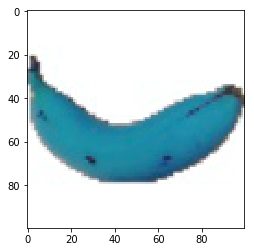

In [11]:
plt.imshow(trainImgArray[1000])

In [12]:
def one_hot_encode(vec, vals=20):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [13]:
labels = os.listdir('dataset/Training/')

In [14]:
# labels,len(labels)

In [15]:
labels_dict = {i : labels[i] for i in range(len(labels))}

In [16]:
print(labels_dict)

{0: 'Apple Red 1', 1: 'Apple Red 2', 2: 'Banana', 3: 'Banana Lady Finger', 4: 'Cherry 2', 5: 'Grape White', 6: 'Grape White 3', 7: 'Guava', 8: 'Lemon', 9: 'Lemon Meyer', 10: 'Lychee', 11: 'Mango', 12: 'Orange', 13: 'Papaya', 14: 'Pear', 15: 'Pineapple', 16: 'Pomegranate', 17: 'Raspberry', 18: 'Strawberry', 19: 'Tomato Cherry Red'}


In [18]:
print(trainlabelslength)

[0, 492, 492, 490, 450, 738, 490, 492, 490, 492, 490, 490, 490, 479, 492, 492, 490, 492, 490, 492, 492]


In [19]:
output_labels = np.zeros((len(trainImgArray),1), dtype=np.int32)
slice_1 = 0
slice_2 = 0
for j in range(len(trainlabelslength)):
    slice_1 += trainlabelslength[j]
    slice_2 += trainlabelslength[j+1]
    output_labels[slice_1:slice_2] = int(j)

IndexError: list index out of range

In [20]:
len(output_labels)

10015

In [28]:
output_labels = np.hstack(output_labels)

In [29]:
output_labels

array([ 0,  0,  0, ..., 19, 19, 19])

In [30]:
binary_output = one_hot_encode(output_labels)

In [31]:
binary_output.shape

(10015, 20)

In [32]:
binary_output[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [45]:
# Using KNN

def distance(x1, x2):
    return np.sqrt(((x1 - x2) ** 2).sum())

def knn(x, train, k=5):
    m = train.shape[0]
    dist = []
    for i in range(m):
        dist.append(distance(x, train[i]))
    dist = np.asarray(dist)
    indx = np.argsort(dist)
    # print("Index...",indx)
    sorted_labels = output_labels[indx][:k]
    counts = np.unique(sorted_labels, return_counts=True)
    return counts[0][np.argmax(counts[1])]

In [46]:
test_img = cv2.imread('test_img_2.jpg')

In [47]:
test_img.shape

(100, 100, 3)

In [48]:
train_data = trainImgArray.reshape((10015,100*100*3))
lab = knn(test_img.flatten(), train_data)
text = labels[int(lab)]

In [49]:
text

'Lychee'